 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [13]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [14]:
# Reading whale returns
import pandas as pd
whale_returns_csv = Path = ('/Users/manindersandhu/Downloads/04-Pandas_Unit 4 Homework_Starter_Code_Resources_whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col ='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [15]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
# Drop nulls
whale_returns.dropna (inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [19]:
# Reading algorithmic returns
algo_returns_csv = Path = ('/Users/manindersandhu/Downloads/04-Pandas_Unit 4 Homework_Starter_Code_Resources_algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [20]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [21]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [26]:
# Reading S&P TSX 60 Closing Prices
spTSX_history_csv = Path = ('/Users/manindersandhu/Downloads/04-Pandas_Unit 4 Homework_Starter_Code_Resources_sp_tsx_history.csv')
spTSX_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
spTSX_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [27]:
# Check Data Types
spTSX_history.dtypes

Close    object
dtype: object

In [63]:
# Fix Data Types
spTSX_history["Close"] = spTSX_history["Close"].replace("$", "")
spTSX_history["Close"] = spTSX_history["Close"].replace(",", "")
spTSX_history["Close"] = spTSX_history["Close"].astype("float")
spTSX_history.dtypes

Close    float64
dtype: object

In [66]:
# Calculate Daily Returns
spTSX_returns = spTSX_history.pct_change()
spTSX_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [68]:
# Drop nulls
spTSX_returns = spTSX_returns.dropna().copy()
spTSX_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [70]:
# Rename `Close` Column to be specific to this portfolio.
spTSX_returns = spTSX_returns.rename(columns={"Close": "S&P TSX 60"})
spTSX_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [84]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns, algo_returns, spTSX_returns], axis="columns", join="inner")
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

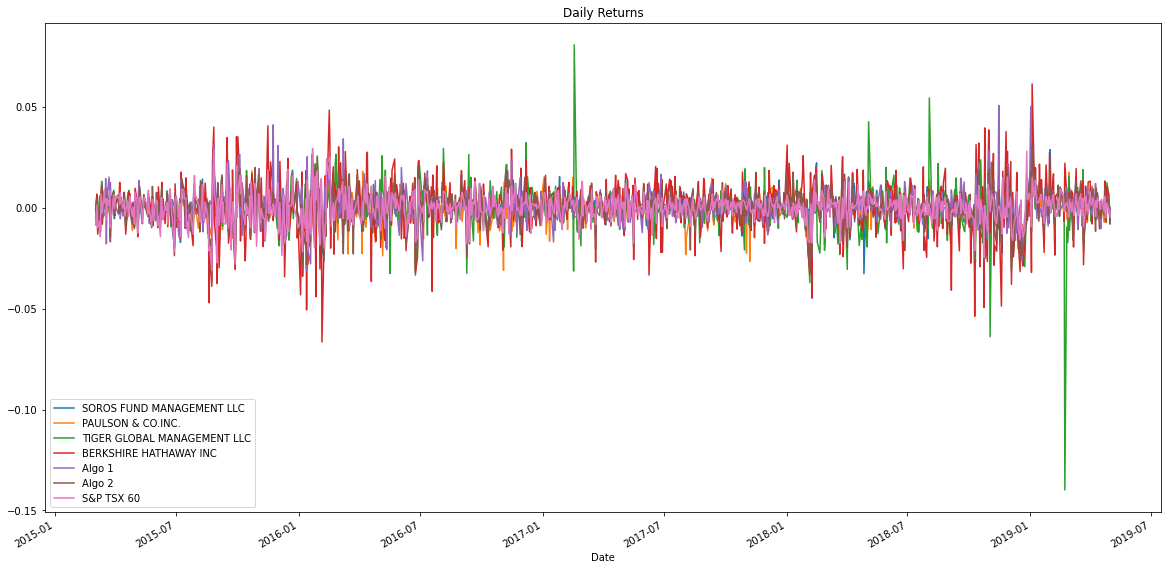

In [72]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

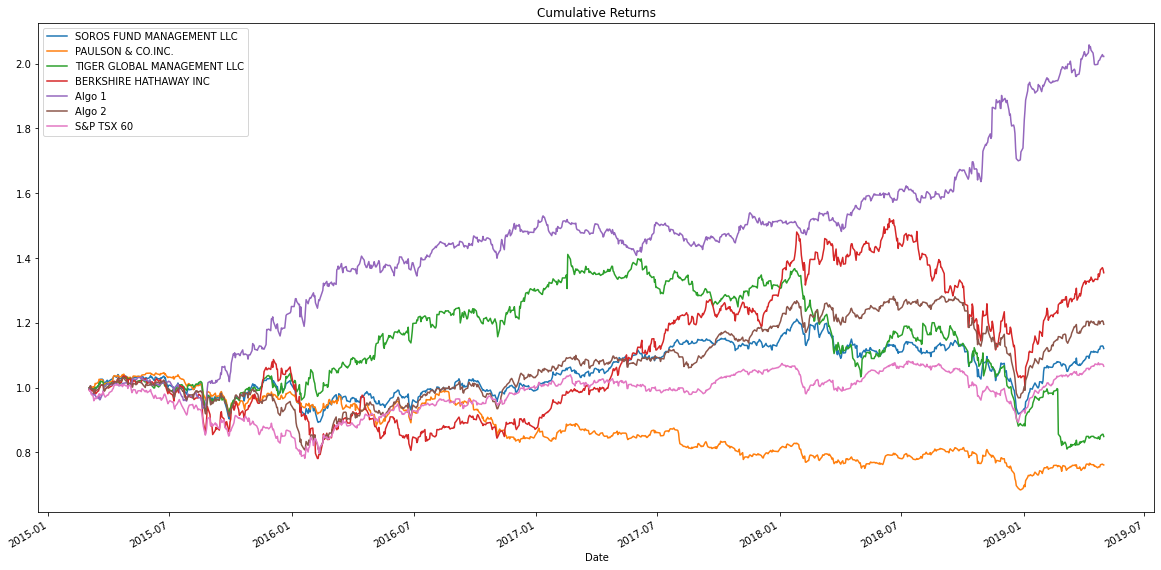

In [74]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

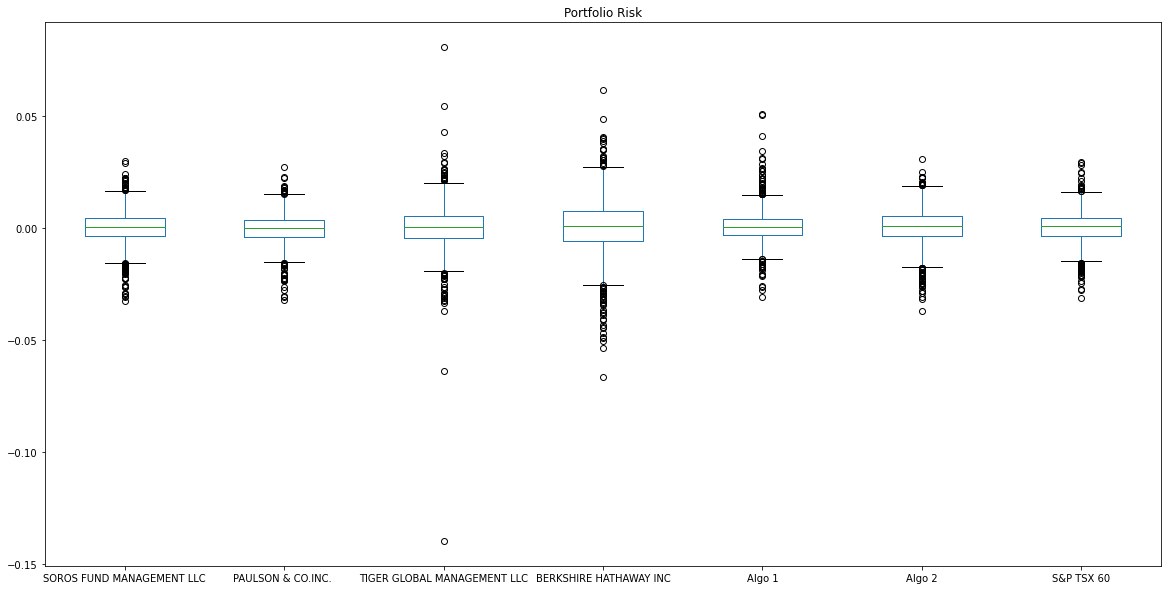

In [78]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20, 10), title="Portfolio Risk")

### Calculate Standard Deviations

In [77]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [87]:
# Calculate  the daily standard deviation of S&P TSX 60
spTSX_risk = all_portfolios["S&P TSX 60"].std()
# Determine which portfolios are riskier than the S&P TSX 60
all_portfolios.std() > spTSX_risk

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX 60                     False
dtype: bool

### Calculate the Annualized Standard Deviation

In [92]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = all_portfolios.std() * np.sqrt(252)
anual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

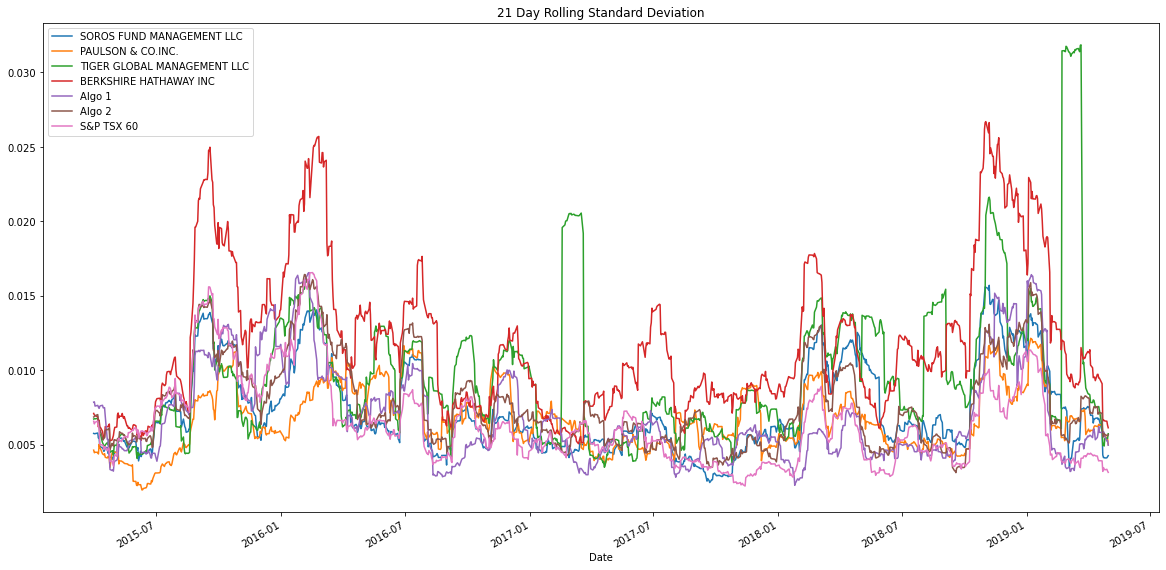

In [96]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_rolling_std = all_portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolios_rolling_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [104]:
# Calculate the correlation
correlation_df = all_portfolios.corr()
# Display de correlation matrix
correlation_df.style.background_gradient(cmap='bwr')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC. beta'}, xlabel='Date'>

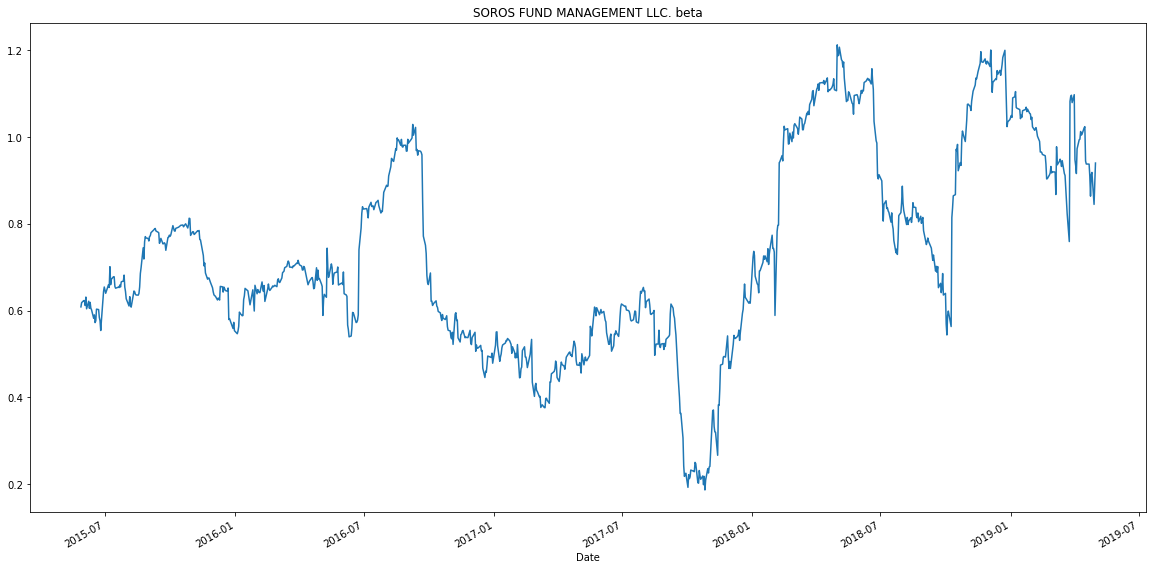

In [154]:
# Calculate covariance of a single portfolio
covariance = all_portfolios["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(all_portfolios["S&P TSX 60"])

# Calculate variance of S&P TSX
variance = all_portfolios["S&P TSX 60"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="SOROS FUND MANAGEMENT LLC. beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

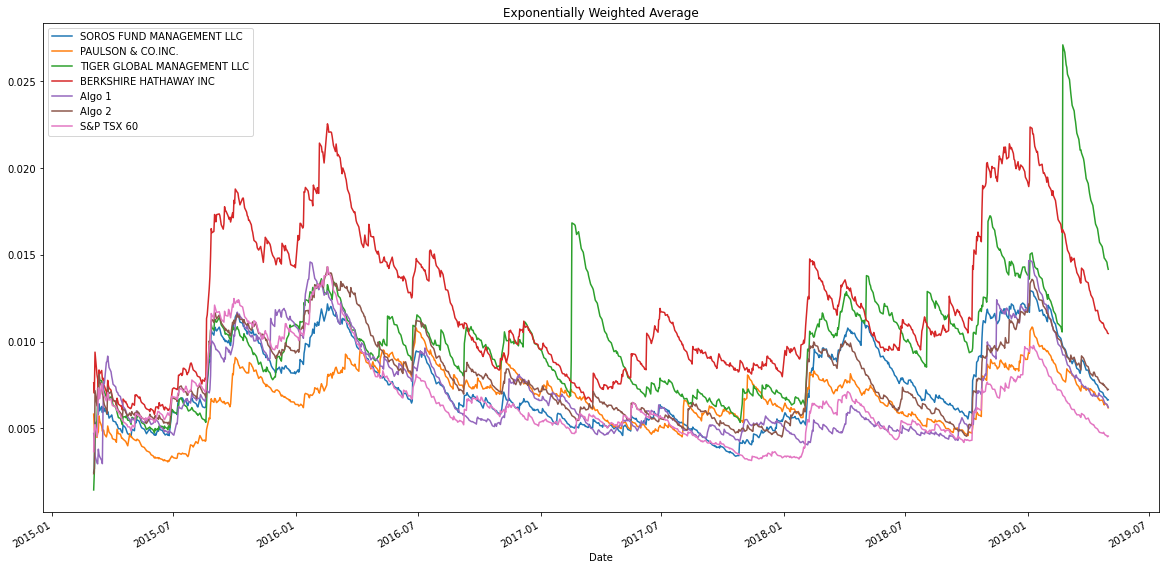

In [120]:
# Use `ewm` to calculate the rolling window
all_portfolios.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [122]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

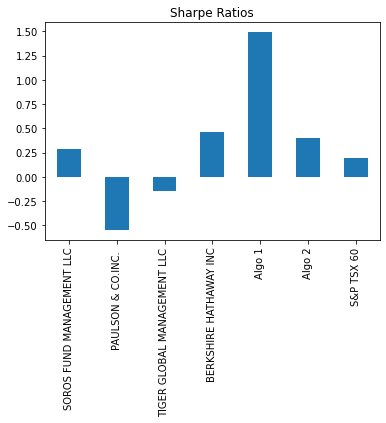

In [128]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---  Both algroithmic strategies outperform the S&P TSX 60 and the whales portfolio, however algo 1 outperforms both (S&P TSX 60 + the whales), and algo 2 outperforms the S&P TSX 60 but not the Whales.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [164]:
# Reading data from 1st stock
shop_1year_csv =  Path = ('/Users/manindersandhu/Downloads/SHOP 1 year prices  - Sheet1.csv')
shop_1year = pd.read_csv(shop_1year_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_1year = shop_1year.sort_index()
shop_1year['ticker'] = ('SHOP')
shop_1year.head()

,Close,ticker
Date,,
2020-01-02 16:00:00,407.81,SHOP
2020-01-03 16:00:00,404.29,SHOP
2020-01-06 16:00:00,413.33,SHOP
2020-01-07 16:00:00,414.50,SHOP
2020-01-08 16:00:00,418.10,SHOP


In [165]:
# Reading data from 2nd stock
otex_1year_csv = Path = ('/Users/manindersandhu/Downloads/OTEX 1 year  prices - Sheet1.csv')
otex_1year = pd.read_csv (otex_1year_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_1year = otex_1year.sort_index()
otex_1year['ticker'] = ('OTEX')
otex_1year.head()

,Close,ticker
Date,,
2020-01-02 16:00:00,44.42,OTEX
2020-01-03 16:00:00,44.20,OTEX
2020-01-06 16:00:00,44.50,OTEX
2020-01-07 16:00:00,44.67,OTEX
2020-01-08 16:00:00,44.99,OTEX


In [166]:
# Reading data from 3rd stock
l_1year_csv = Path = ('/Users/manindersandhu/Downloads/L 1 year prices - Sheet1.csv')
l_1year = pd.read_csv (l_1year_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
l_1year = l_1year.sort_index()
l_1year['ticker'] = ('L')
l_1year.head()

,Close,ticker
Date,,
2020-01-02 16:00:00,52.96,L
2020-01-03 16:00:00,52.76,L
2020-01-06 16:00:00,52.08,L
2020-01-07 16:00:00,51.84,L
2020-01-08 16:00:00,51.85,L


In [168]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([shop_1year, otex_1year,l_1year], join="inner")
all_stocks.tail()

,Close,ticker
Date,,
2020-12-23 16:00:00,44.10,L
2020-12-24 13:00:00,44.00,L
2020-12-28 16:00:00,44.42,L
2020-12-29 16:00:00,44.06,L
2020-12-30 16:00:00,44.42,L


In [203]:
# Reset Date index
combined_stocks.reset_index()

ticker,Date,L,OTEX,SHOP
0,2020-01-02 16:00:00,NaN,NaN,NaN
1,2020-01-03 16:00:00,NaN,NaN,NaN
2,2020-01-06 16:00:00,2.412889,-2.370424,-3.590542
3,2020-01-07 16:00:00,-0.642451,-0.437154,-0.873406
4,2020-01-08 16:00:00,-1.041860,0.875189,2.068238
...,...,...,...,...
247,2020-12-23 16:00:00,-2.482724,-1.530652,-1.929276
248,2020-12-24 13:00:00,-1.092971,-3.082260,-1.371337
249,2020-12-28 16:00:00,-5.209545,-1.082240,-3.782858
250,2020-12-29 16:00:00,-1.849038,2.804159,-1.334301


In [184]:
# Reorganize portfolio data by having a column per symbol
combined_stocks = pd.pivot_table(all_stocks, values='Close', index=['Date'],
                      columns=['ticker'])
combined_stocks.head()

ticker,L,OTEX,SHOP
Date,,,
2020-01-02 16:00:00,52.96,44.42,407.81
2020-01-03 16:00:00,52.76,44.20,404.29
2020-01-06 16:00:00,52.08,44.50,413.33
2020-01-07 16:00:00,51.84,44.67,414.50
2020-01-08 16:00:00,51.85,44.99,418.10


In [187]:
# Calculate daily returns
combined_stocks = combined_stocks.pct_change()

# Drop NAs
combined_stocks.dropna().copy()
no_na_stocks = combined_stocks.dropna().copy()
no_na_stocks.head()
# Display sample data

ticker,L,OTEX,SHOP
Date,,,
2020-01-06 16:00:00,2.412889,-2.370424,-3.590542
2020-01-07 16:00:00,-0.642451,-0.437154,-0.873406
2020-01-08 16:00:00,-1.041860,0.875189,2.068238
2020-01-09 16:00:00,84.983414,2.102773,2.332171
2020-01-10 16:00:00,-1.732044,-1.185869,-1.082730


In [188]:
2.412889 * 1/3

0.8042963333333333

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [192]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_stocks.apply(lambda x: x * (1 / 3))
portfolio_returns.loc['2020-01-06 16:00:00']

In [213]:
portfolio_returns.drop (['Date'], axis = 1, inplace=True)

In [207]:
# Display sample data

portfolio_returns['New Date'] = portfolio_returns.index.date
portfolio_returns.head()

In [218]:
portfolio_returns.head()

ticker,L,OTEX,SHOP,New Date
Date,,,,
2020-01-02 16:00:00,NaN,NaN,NaN,2020-01-02
2020-01-03 16:00:00,NaN,NaN,NaN,2020-01-03
2020-01-06 16:00:00,0.804296,-0.790141,-1.196847,2020-01-06
2020-01-07 16:00:00,-0.214150,-0.145718,-0.291135,2020-01-07
2020-01-08 16:00:00,-0.347287,0.291730,0.689413,2020-01-08


In [219]:
portfolio_returns.reset_index()

ticker,Date,L,OTEX,SHOP,New Date
0,2020-01-02 16:00:00,NaN,NaN,NaN,2020-01-02
1,2020-01-03 16:00:00,NaN,NaN,NaN,2020-01-03
2,2020-01-06 16:00:00,0.804296,-0.790141,-1.196847,2020-01-06
3,2020-01-07 16:00:00,-0.214150,-0.145718,-0.291135,2020-01-07
4,2020-01-08 16:00:00,-0.347287,0.291730,0.689413,2020-01-08
...,...,...,...,...,...
247,2020-12-23 16:00:00,-0.827575,-0.510217,-0.643092,2020-12-23
248,2020-12-24 13:00:00,-0.364324,-1.027420,-0.457112,2020-12-24
249,2020-12-28 16:00:00,-1.736515,-0.360747,-1.260953,2020-12-28
250,2020-12-29 16:00:00,-0.616346,0.934720,-0.444767,2020-12-29


In [220]:
portfolio_returns.set_index('New Date', inplace=True)

In [221]:
portfolio_returns.index.rename('Date', inplace= True)

In [222]:
portfolio_returns.head()

ticker,L,OTEX,SHOP
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-06,0.804296,-0.790141,-1.196847
2020-01-07,-0.214150,-0.145718,-0.291135
2020-01-08,-0.347287,0.291730,0.689413


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [252]:
# Join your returns DataFrame to the original returns DataFrame
df = pd.join([all_portfolios,portfolio_returns ], axis="rows", join="inner")

In [225]:
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [234]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios = all_portfolios.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [235]:
# Calculate the annualized `std`
risk = all_portfolios.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

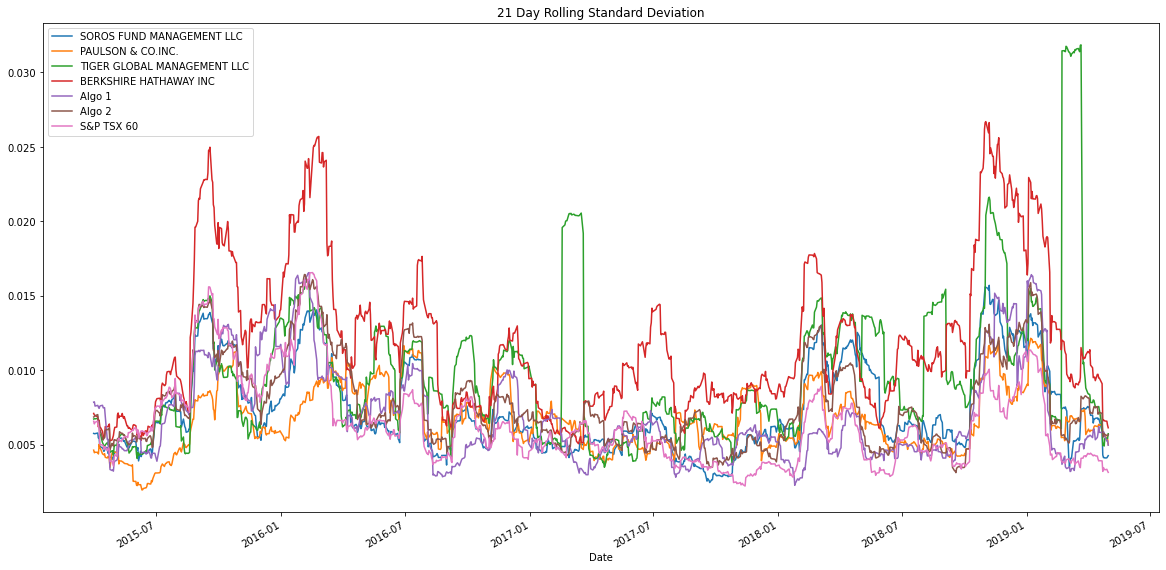

In [237]:
# Calculate rolling standard deviation
rolling_std_dev = all_portfolios.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_dev.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [240]:
# Calculate and plot the correlation
df = all_portfolios.corr()
df.style.background_gradient
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [250]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

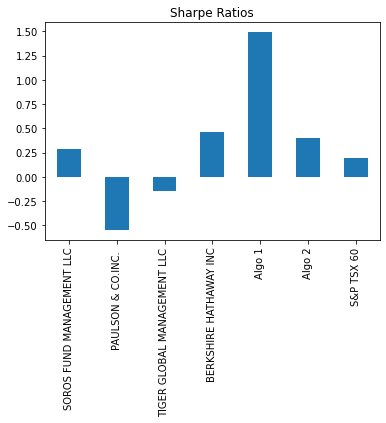

In [251]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")